# GAME "MARTIAL LAW"
### Inspired by WORMS

#### Martial Law is a <b>Python artillery tacticle game</b>, in which there are two opponent teams (you and your enemy), each of which set a goal of killing each other using different types of weapons.

#### In the beginning of the game, you and your enemy appear on the random place of the map. It looks like this:
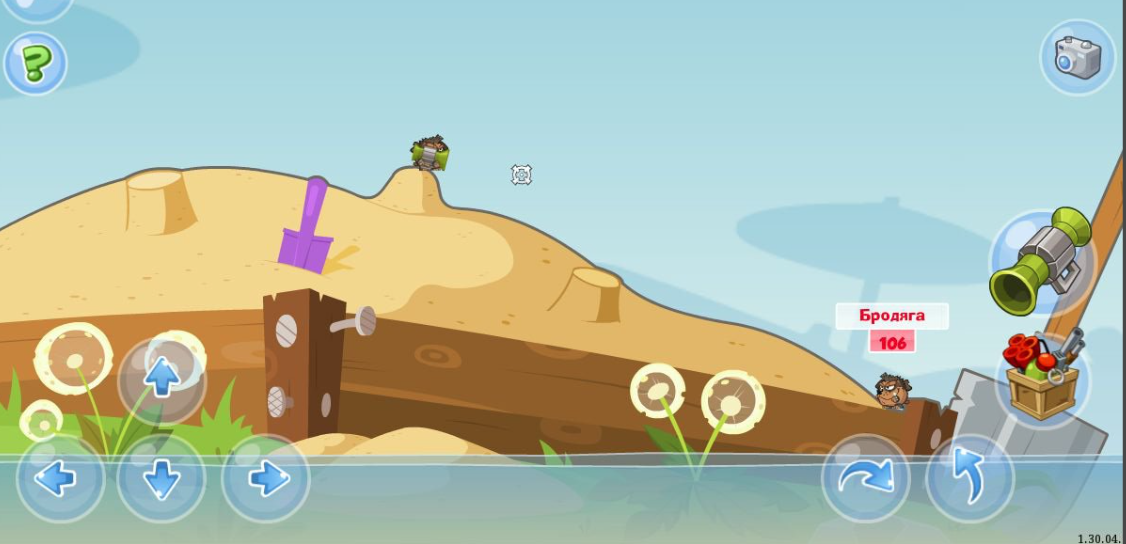

#### In the beginning, both you and your enemy have some initial health level (HP) and a particular set of weapons. Each weapon has a particular damage (depending on the quality of weapon). Each player has an opportunity to use some available weapon only during the turn of this player (when its' your turn, you use your weapon, but when it is the turn of enemy, you may not use weapons). The game aim is to kill your opponent (before he kills you) using weapons that you have.

#### Initially, you have only two weapons: bazooka and some grenades. You may use all the weapons that you have only a limited number of times. After each players' turn, some bonus appears on the map: it is either a weapon box (which containts some random weapon with random characteristics) or a health box (which increases your health by some random number of health points).

#### During each turn you have some LIMITED amount of energy that you may spend on inflicting damage on the enemy, defending yourself or moving along the map, concurrently looting weapon and health boxes. Each weapon and each movement along the map spends different amount of energy. Players' turn ends, when the amount of left energy does not allow to perform any actions. After each turn, your and your enemies' amount of energy increases (for instance: 5 energy for your first move, 5 energy for the first enemies' move. Then, 8 energy for your and your enemy second moves and so on).

#### Set of all possible game actions:
1. Choose the hero 
2. Choose the easy/hard regime and begin the game;
3. Move along the map horizontally (walk);
4. Move along the map vertically (jump);
5. Collect inventory - weapon or health boxes;
6. Check inventory;
7. Attack/Inflict damage on the enemy;
8. End/Miss the move;
9. Surrender.

#### Explanations of actions:
1. At the beginning you may choose your hero. Different heroes have different abilities:
    1. Wolf: damage from all weapons increases by 20%;
    2. Kangaroo: using weapons requires 15% less energy;
    3. Rabbit: each move you have 10% chance of getting no damage from emenies' weapon at all.
2. Choose the easy/hard regime. 9. **In hard regime: weapon ranges fall by 20%, you spend 15% more energy on weapons**.
3. Map has 70 horizontal cells and 3 floors. Horizontally moving along one cell requires spending 1 energy.
4. There are 3 floors. To move to the upper/lower floor you need to jump/come down, each of which costs 5 energy. One floor distance between opponents is equal to 5 cells range. That is, if you are on the (1,1) cell and your enemy is on the (70,3) cell, then the distance between two of you is 69 + 5 + 5 = 79 cells. **This is how map looks:**
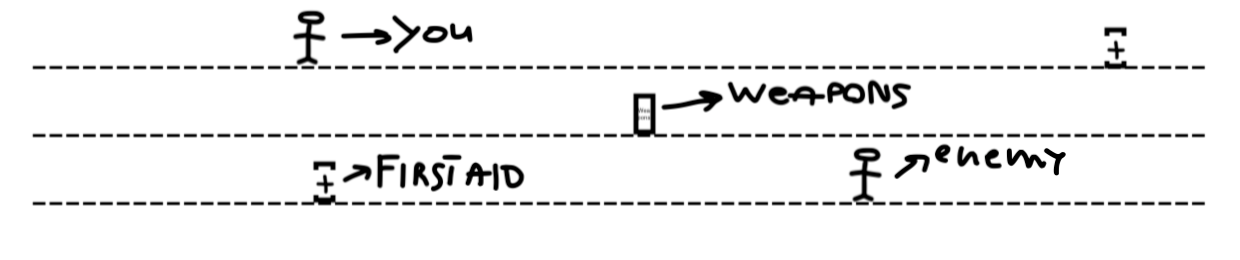
5. After each move some weapon/health box appear on the map. It may appear on any cell on any floor. If weapon/health box is located 20 cells right to you - then you need to move along these 20 cells (spend 20 energy) to get this box. Health boxes increase HP by:


    1. 30 HP with 55% chance;
    2. 50 HP with 20% chance;
    3. 70 HP with 10% chance;
    4. 85 HP with 7% chance;
    5. 100 HP with 5% chance;
    6. 125 HP with 3% chance.
    
6. You may always check your inventory.
7. Each weapon may be used limited number of times (for instance, if you have 3 grenades - you may use them 3 times). Also, each weapon may be used in different proximity to enemy (for instance, rifle is long-range and hits the enemy in the range of 40 cells). That is, to use some weapons we need to get closer to the enemy. You may use only ONE WEAPON per move. Weapon boxes may contain:
   
| Weapon name | Energy required | HP damage | Cells range | Items per box | Drop chance |
| --- | --- | --- | --- | --- | --- |
| Bazooka | 20 | 20 | 20 | 2-4 | 18% |
| Grenade | 25 | 30 | 25 | 1-4 | 14% |
| Rifle | 10 | 25 | 30 | 1-3 | 13% |
| Mortar | 35 | 65 | 10 | 1-2 | 9% |
| Freeze gun | 10 | 40 | 10 | 1 | 7% |
| Machine gun | 15 | 25 | 50 | 2-3 | 13% |
| Stun gun | 5 | 30 | 30 | 1 | 8% |
| Isolator | 40 | 80 | 5 | 1 | 7% |
| Banana Bomb | 60 | 100 | 20 | 1 | 6% |
| Donkey Tower | 60 | 125 | 10 | 1 | 5% |

8. You may always end your move independently of the amount of energy left.
9. You may always surrender.
10. **Initially you and your enemy have 250 HP each, 40 energy (+3 energy each move), 3 bazookas and 2 grenades**.

### Example of the game:
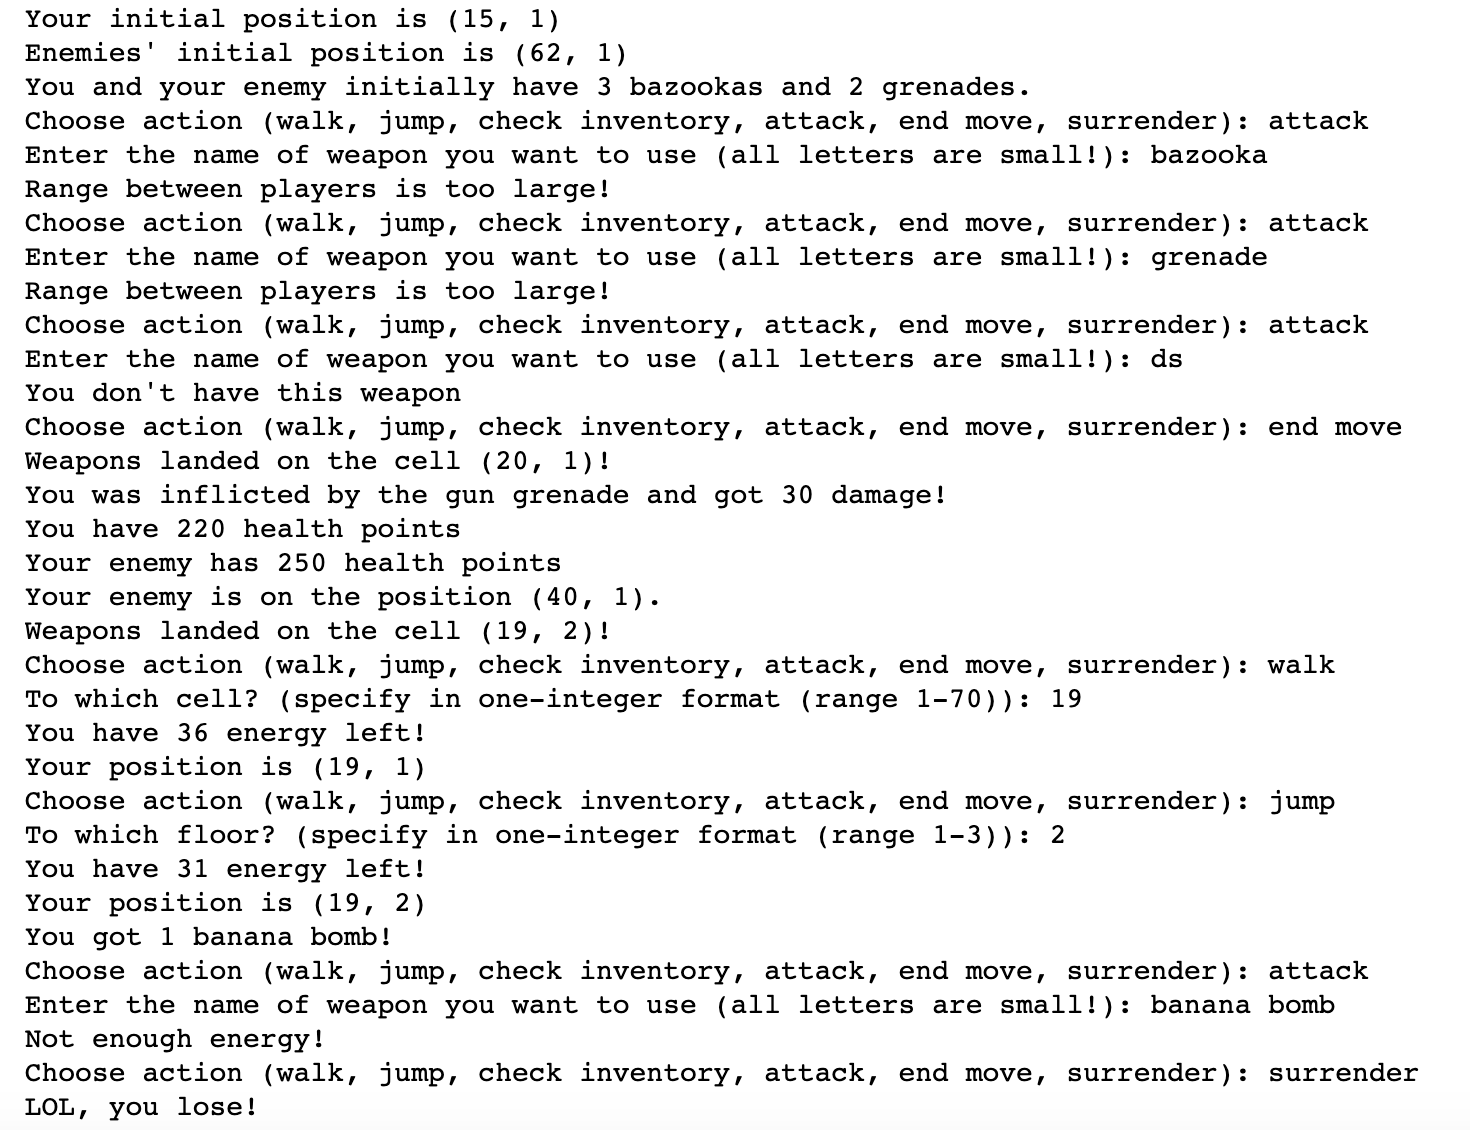

In [2]:
import random
import numpy as np

In [3]:
def choosehero():
    global hero, enemy
    heroes = ["Wolf", "Kangaroo", "Rabbit"]
    
    while True:
        hero = str(input("Please, choose your hero (Wolf, Kangaroo or Rabbit): "))
        if hero not in heroes:
            print("Please, choose the existing hero")
        else:
            break
    enemy = random.choice(heroes)

In [4]:
def chooseregime():
    global regime
    
    regime = str(input("Please, choose the difficulty regime (easy/hard): "))

In [5]:
def walk(init_pos, final_pos):
    global en1
    
    dist = abs(init_pos - final_pos)
    if en1 >= dist:
        en1 -= dist
        print(f"You have {en1} energy left!")
        print(f"Your position is {(final_pos, floor_position[0])}")
    else:
        return "Not enough energy!"

In [6]:
def jump(init_floor, final_floor):
    global en1
    
    height = abs(init_floor - final_floor)
    if en1 >= height * 5:
        en1 -= height * 5
        print(f"You have {en1} energy left!")
        print(f"Your position is {(cell_position[0], final_floor)}")
    else:
        return "Not enough energy!"

In [7]:
def collect_inventory(bonus_value):
    global firstaidkit_box_locations_and_values, weapon_box_locations_and_values, cell_position, floor_position, weapons1, hp1
    
    if bonus_value == "First aid":
        healthplus = firstaidkit_box_locations_and_values[(cell_position[0], floor_position[0])]
        hp1 += healthplus
        del firstaidkit_box_locations_and_values[(cell_position[0], floor_position[0])]
        print(f"You gained {healthplus} health points!")
    elif bonus_value == "Weapons":
        which_weapon = weapon_box_locations_and_values[(cell_position[0], floor_position[0])][0]
        weapon_number = weapon_box_locations_and_values[(cell_position[0], floor_position[0])][1]
        if which_weapon not in weapons1.keys():
            weapons1[which_weapon] = weapon_number
        else:
            weapons1[which_weapon] += weapon_number
        del weapon_box_locations_and_values[(cell_position[0], floor_position[0])]
        print(f"You got {weapon_number} {which_weapon}!")

In [8]:
def check_inventory():
    global weapons1

    return weapons1

In [9]:
def attack(weaponname):
    global cell_position, cell_position_enemy, floor_position, floor_position_enemy, weapons1, en1, hp2, hero, regime
    
    distance_between_players = abs(cell_position[0] - cell_position_enemy[0]) + 5 * abs(floor_position[0] - floor_position_enemy[0])
    all_weapon_names = ["bazooka", "grenade", "rifle", "mortar", "freeze gun", "machine gun", "stun gun", "isolator", "banana bomb", "donkey tower"]
    energy_required = [20, 25, 10, 35, 10, 15, 5, 40, 60, 60]
    
    if hero != "Kangaroo":
        energy_required = energy_required
    else:
        energy_required = [i * 0.85 for i in energy_required]
        
    if regime == "easy":
        energy_required = energy_required
    else:
        energy_required = [i * 1.15 for i in energy_required]
        
    hp_damage = [20, 30, 25, 65, 40, 25, 30, 80, 100, 125]
    
    if hero != "Wolf":
        hp_damage = hp_damage
    else:
        hp_damage = [i * 1.2 for i in hp_damage]
        
    cells_range = [20, 25, 30, 10, 10, 50, 30, 5, 20, 10]
    
    if regime == "easy":
        cells_range = cells_range
    else:
        cells_range = [i * 0.8 for i in cells_range]
        
    for num, weapon in enumerate(all_weapon_names):
        if weaponname == weapon:
            if energy_required[num] > en1:
                print("Not enough energy!")
            else:
                if cells_range[num] < distance_between_players:
                    print("Range between players is too large!")
                else:
                    en1 -= energy_required[num]
                    hp2 -= hp_damage[num]
                    weapons1[weapon_to_attack] -= 1
                    if weapons1[weapon_to_attack] == 0:
                        del weapons1[weapon_to_attack]
                    print(f"You inflicted {hp_damage[num]} on your enemy!")
                    print(f"You have {hp1} health points")
                    print(f"You have {en1} energy left")
                    print(f"Your enemy has {hp2} health points")

In [10]:
# def defend():

In [11]:
def end_move():
    global firstaidkit_box_locations_and_values, weapon_box_locations_and_values
    
    inventories = ["First aid kit", "Weapons"]
    bonus = random.choice(inventories)
    
    all_health_values = [30, 50, 70, 85, 100, 125]
    health_value = np.random.choice(all_health_values, p=[0.55, 0.2, 0.1, 0.07, 0.05, 0.03])
    
    all_weapon_values = ["bazooka", "grenade", "rifle", "mortar", "freeze gun", "machine gun", "stun gun", "isolator", "banana bomb", "donkey tower"]
    weapon_value = np.random.choice(all_weapon_values, p=[0.18, 0.14, 0.13, 0.09, 0.07, 0.13, 0.08, 0.07, 0.06, 0.05])
    
    all_weapon_quantites = [(2, 3, 4), (1, 2, 3, 4), (1, 2, 3), (1, 2), (1, 1), (2, 3), (1, 1), (1, 1), (1, 1), (1, 1)]
    for num, i in enumerate(all_weapon_values):
        if i == weapon_value:
            weapon_quantity = random.choice(all_weapon_quantites[num])
    
    box_location = (np.random.randint(1, 71), np.random.randint(1, 4))
    if bonus == "First aid kit":
        firstaidkit_box_locations_and_values[box_location] = health_value
    elif bonus == "Weapons":
        weapon_box_locations_and_values[box_location] = (weapon_value, weapon_quantity)
    print(f"{bonus} landed on the cell {box_location}!")

In [12]:
def surrender():
    print("LOL, you lose!")

In [19]:
# FINALLY, RUNNING THE GAME
choosehero()
chooseregime()

hp1 = 250
hp2 = 250
en1 = 40
en2 = 40
weapons1 = {"bazooka": 3, "grenade": 2}
weapons2 = {"bazooka": 30, "grenade": 20}
weapon_box_locations_and_values = {}
firstaidkit_box_locations_and_values = {}


cell_position = [np.random.randint(1, 71)]
cell_position_enemy = [np.random.randint(1, 71)]
floor_position = [np.random.randint(1, 4)]
floor_position_enemy = [np.random.randint(1, 4)]
print(f"Your initial position is {cell_position[0], floor_position[0]}")
print(f"Enemies' initial position is {cell_position_enemy[0], floor_position_enemy[0]}")
print("You and your enemy initially have 3 bazookas and 2 grenades.")
ens = [37, 37]
moves = 0
attacks = 0
s = 0
while True:
    if hp1 <= 0:
        break
    if moves == 0:
        ens[0] += 3
        ens[1] += 3
        en1 = ens[0]
        en2 = ens[1]
    # What to do:
    answer = str(input("Choose action (walk, jump, check inventory, attack, end move, surrender): "))
    
    # WALKING
    if answer == "walk":
        moves += 1
        where_to_go = int(input("To which cell? (specify in one-integer format (range 1-70)): "))
        if where_to_go < 1 or where_to_go > 70:
            print("Out of map range!")
        else:
            res = walk(cell_position[0], where_to_go)
            if res != "Not enough energy!":
                cell_position.append(where_to_go)
                del cell_position[0]
            else:
                print(res)

            # What if we walk to the cell with some bonus (first aid or weapons):
            for num, bonus_location in enumerate(firstaidkit_box_locations_and_values):
                if cell_position[0] == list(firstaidkit_box_locations_and_values.keys())[num][0] and floor_position[0] == list(firstaidkit_box_locations_and_values.keys())[num][1]:
                    collect_inventory("First aid")
                    break
            for num, bonus_location in enumerate(weapon_box_locations_and_values):
                if cell_position[0] == list(weapon_box_locations_and_values.keys())[num][0] and floor_position[0] == list(weapon_box_locations_and_values.keys())[num][1]:
                    collect_inventory("Weapons")
                    break
    
    # JUMPING
    elif answer == "jump":
        moves += 1
        where_to_jump = int(input("To which floor? (specify in one-integer format (range 1-3)): "))
        if where_to_jump < 1 or where_to_jump > 3:
            print("Out of map range!")
        else:
            res = jump(floor_position[0], where_to_jump)
            if res != "Not enough energy!":
                floor_position.append(where_to_jump)
                del floor_position[0]
            else:
                print(res)

            # What if we jump to the cell with some bonus (first aid or weapons):
            for num, bonus_location in enumerate(firstaidkit_box_locations_and_values):
                if cell_position[0] == list(firstaidkit_box_locations_and_values.keys())[num][0] and floor_position[0] == list(firstaidkit_box_locations_and_values.keys())[num][1]:
                    collect_inventory("First aid")
                    break
            for num, bonus_location in enumerate(weapon_box_locations_and_values):
                if cell_position[0] == list(weapon_box_locations_and_values.keys())[num][0] and floor_position[0] == list(weapon_box_locations_and_values.keys())[num][1]:
                    collect_inventory("Weapons")
                    break
    
    # CHECKING INVENTORY
    elif answer == "check inventory":
        moves += 1
        print(check_inventory())
    
    # ATTACKING
    elif answer == "attack":
        if attacks == 0:
            moves += 1
            weapon_to_attack = str(input("Enter the name of weapon you want to use (all letters are small!): "))
            if weapon_to_attack not in weapons1.keys():
                print("You don't have this weapon")
            else:
                res = attack(weapon_to_attack)
                if res == "Not enough energy!" or res == "Range between players is too large!":
                    print(res)
                else:
                    res
                    attacks += 1
                if hp2 <= 0:
                    print("YOU WIN!")
                    break
        else:
            print("You've already attacked!")
            
        
    # DEFENDING
    # elif answer == "defend":
        
    # SURRENDERING
    elif answer == "surrender":
        surrender()
        break
    
    # ENDING MOVE
    elif answer == "end move":
        moves += 1
        end_move()
        
# -----------------------------------------------------------------------------

        # NOW, IT'S ENEMIES' MOVE
        s = 0
        distance_between_players = abs(cell_position[0] - cell_position_enemy[0]) + 5 * abs(floor_position[0] - floor_position_enemy[0])
        all_weapon_names = ["donkey tower", "banana bomb", "isolator", "mortar", "freeze gun", "grenade","stun gun", "rifle", "machine gun", "bazooka"]
        energy_required = [60, 60, 40, 35, 10, 25, 5, 10, 15, 20]
        hp_damage = [125, 100, 80, 65, 40, 30, 30, 25, 25, 20]
        cells_range = [10, 20, 5, 10, 10, 25, 30, 30, 50, 20]
        
        enemies_weapons_and_ranges = {}
        for i in all_weapon_names:
            if i in weapons2.keys():
                enemies_weapons_and_ranges[i] = cells_range[all_weapon_names.index(i)]
        
        # FIRST SCENARIO:
        # Case when enemy can take first aid and attack concurrently
        for i in firstaidkit_box_locations_and_values.keys():
            enemy_to_box = abs((i[0] - cell_position_enemy[0]) + 5 * (abs(i[1] - floor_position_enemy[0])))
            for j in range(0, 2):
                # Case when enemy cannot attack from the place of first aid because of large distance box <-> hero
                if abs((i[0] - cell_position[0]) + 5 * (abs(i[1] - floor_position[0]))) > list(enemies_weapons_and_ranges.values())[j]:
                    box_to_hero = abs((i[0] - cell_position[0]) + 5 * (abs(i[1] - floor_position[0]))) - list(enemies_weapons_and_ranges.values())[j]
                # Case when enemy attacks from the place of first aid
                else:
                    box_to_hero = 0
                    
                enemy_to_hero = enemy_to_box + box_to_hero
                # How much energy it is needed to attack hero and take the first aid concurrently?
                enemy_to_hero_with_weapon = enemy_to_hero + energy_required[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]
                
                # If this energy is enough
                if en2 >= enemy_to_hero_with_weapon:
                    cell_position_enemy[0] = i[0]
                    floor_position_enemy[0] = i[1]
                    
                    #en2 -= enemy_to_hero_with_weapon

                    healthplus = firstaidkit_box_locations_and_values[i]
                    hp2 += healthplus
                    del firstaidkit_box_locations_and_values[i]
                    print(f"Enemy took the first aid kit and gained {healthplus} health points!")
                    
                    if hero != "Rabbit":
                        hp1 -= hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]
                    else:
                        hp1 -= np.random.choice([0, hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]], p=[0.1, 0.9])
                    weapons2[list(enemies_weapons_and_ranges.keys())[j]] -= 1
                    if weapons2[list(enemies_weapons_and_ranges.keys())[j]] == 0:
                        del weapons2[list(enemies_weapons_and_ranges.keys())[j]]
                    print(f"You was inflicted by the gun {list(enemies_weapons_and_ranges.keys())[j]} and got {hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]} damage!")
                    print(f"You have {hp1} health points")
                    print(f"Your enemy has {hp2} health points")
                    
                    # If to attack hero the enemy needs to move from first aid closer to hero
                    if box_to_hero != 0:
                        if cell_position_enemy[0] < cell_position[0]:
                            cell_position_enemy[0] = cell_position[0] - (list(enemies_weapons_and_ranges.values())[j] - (5 * abs(i[1] - floor_position[0])))
                        else:
                            cell_position_enemy[0] = cell_position[0] + (list(enemies_weapons_and_ranges.values())[j] - (5 * abs(i[1] - floor_position[0])))
                    print(f"Your enemy is on the position {(cell_position_enemy[0], floor_position_enemy[0])}.")
                    if hp1 <= 0:
                        print("LOL, you lose!")
                    end_move()
                    s = 1
                    break
                # If this energy is not enough - move to the next scenario
                else:
                    continue
            if s == 1:
                moves = 0
                attacks = 0
                break
        
        # SECOND SCENARIO:
        # Case when enemy can take weapon box and attack concurrently
        if s != 1:
            for i in weapon_box_locations_and_values.keys():
                enemy_to_box = abs((i[0] - cell_position_enemy[0]) + 5 * (abs(i[1] - floor_position_enemy[0])))
                for j in range(0, 2):
                    # Case when enemy cannot attack from the place of weapon box because of large distance box <-> hero
                    if abs((i[0] - cell_position[0]) + 5 * (abs(i[1] - floor_position[0]))) > list(enemies_weapons_and_ranges.values())[j]:
                        box_to_hero = abs((i[0] - cell_position[0]) + 5 * (abs(i[1] - floor_position[0]))) - list(enemies_weapons_and_ranges.values())[j]
                    # Case when enemy attacks from the place of weapon box
                    else:
                        box_to_hero = 0

                    enemy_to_hero = enemy_to_box + box_to_hero
                    # How much energy it is needed to attack hero and take the weapon box concurrently?
                    enemy_to_hero_with_weapon = enemy_to_hero + energy_required[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]

                    # If this energy is enough
                    if en2 >= enemy_to_hero_with_weapon:
                        cell_position_enemy[0] = i[0]
                        floor_position_enemy[0] = i[1]

                        en2 -= enemy_to_hero_with_weapon

                        which_weapon = weapon_box_locations_and_values[i][0]
                        weapon_number = weapon_box_locations_and_values[i][1]
                        if which_weapon not in weapons2.keys():
                            weapons2[which_weapon] = weapon_number
                        else:
                            weapons2[which_weapon] += weapon_number
                        del weapon_box_locations_and_values[i]
                        print(f"Enemy got {weapon_number} {which_weapon}!")

                        if hero != "Rabbit":
                            hp1 -= hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]
                        else:
                            hp1 -= np.random.choice([0, hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]], p=[0.1, 0.9])
                        weapons2[list(enemies_weapons_and_ranges.keys())[j]] -= 1
                        if weapons2[list(enemies_weapons_and_ranges.keys())[j]] == 0:
                            del weapons2[list(enemies_weapons_and_ranges.keys())[j]]
                        print(f"You was inflicted by the gun {list(enemies_weapons_and_ranges.keys())[j]} and got {hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]} damage!")
                        print(f"You have {hp1} health points")
                        print(f"Your enemy has {hp2} health points")

                        # If to attack hero the enemy needs to move from weapon box closer to hero
                        if box_to_hero != 0:
                            if cell_position_enemy[0] < cell_position[0]:
                                cell_position_enemy[0] = cell_position[0] - (list(enemies_weapons_and_ranges.values())[j] - (5 * abs(i[1] - floor_position[0])))
                            else:
                                cell_position_enemy[0] = cell_position[0] + (list(enemies_weapons_and_ranges.values())[j] - (5 * abs(i[1] - floor_position[0])))
                        print(f"Your enemy is on the position {(cell_position_enemy[0], floor_position_enemy[0])}.")
                        if hp1 <= 0:
                            print("LOL, you lose!")
                        end_move()
                        s = 1
                        break
                    # If this energy is not enough - move to the next scenario
                    else:
                        continue
                if s == 1:
                    moves = 0
                    attacks = 0
                    break

        # THIRD SCENARIO:
        if s != 1:
            for j in range(2):
                if abs(cell_position_enemy[0] - cell_position[0]) + 5 * (abs(floor_position_enemy[0] - floor_position[0])) <= list(enemies_weapons_and_ranges.values())[j]:
                    if en2 >= energy_required[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]:
                        if hero != "Rabbit":
                            hp1 -= hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]
                        else:
                            hp1 -= np.random.choice([0, hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]], p=[0.1, 0.9])
                        weapons2[list(enemies_weapons_and_ranges.keys())[j]] -= 1
                        if weapons2[list(enemies_weapons_and_ranges.keys())[j]] == 0:
                            del weapons2[list(enemies_weapons_and_ranges.keys())[j]]
                        print(f"You was inflicted by the gun {list(enemies_weapons_and_ranges.keys())[j]} and got {hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]} damage!")
                        print(f"You have {hp1} health points")
                        print(f"Your enemy has {hp2} health points")
                        if hp1 <= 0:
                            print("LOL, you lose!")
                        end_move()
                        moves = 0
                        attacks = 0
                        break
                    else:
                        break
                elif abs(cell_position_enemy[0] - cell_position[0]) + 5 * (abs(floor_position_enemy[0] - floor_position[0])) > list(enemies_weapons_and_ranges.values())[j]:
                    if abs(cell_position_enemy[0] - cell_position[0]) + 5 * (abs(floor_position_enemy[0] - floor_position[0])) - list(enemies_weapons_and_ranges.values())[j] + energy_required[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])] > en2:
                        if cell_position_enemy[0] < cell_position[0]:
                            cell_position_enemy[0] = cell_position[0] - (list(enemies_weapons_and_ranges.values())[j] - (5 * abs(floor_position_enemy[0] - floor_position[0])))
                        else:
                            cell_position_enemy[0] = cell_position[0] + (list(enemies_weapons_and_ranges.values())[j] - (5 * abs(floor_position_enemy[0] - floor_position[0])))

                        if hero != "Rabbit":
                            hp1 -= hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]
                        else:
                            hp1 -= np.random.choice([0, hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]], p=[0.1, 0.9])
                        weapons2[list(enemies_weapons_and_ranges.keys())[j]] -= 1
                        if weapons2[list(enemies_weapons_and_ranges.keys())[j]] == 0:
                            del weapons2[list(enemies_weapons_and_ranges.keys())[j]]
                        print(f"You was inflicted by the gun {list(enemies_weapons_and_ranges.keys())[j]} and got {hp_damage[all_weapon_names.index(list(enemies_weapons_and_ranges.keys())[j])]} damage!")
                        print(f"You have {hp1} health points")
                        print(f"Your enemy has {hp2} health points")
                        print(f"Your enemy is on the position {(cell_position_enemy[0], floor_position_enemy[0])}.")
                        if hp1 <= 0:
                            print("LOL, you lose!")
                        end_move()
                        moves = 0
                        attacks = 0
                        break
                    else:
                        break

    else:
        print("Please, specify action correctly")

Please, choose your hero (Wolf, Kangaroo or Rabbit): Rabbit
Please, choose the difficulty regime (easy/hard): easy
Your initial position is (6, 3)
Enemies' initial position is (56, 2)
You and your enemy initially have 3 bazookas and 2 grenades.
Choose action (walk, jump, check inventory, attack, end move, surrender): walk 
Please, specify action correctly
Choose action (walk, jump, check inventory, attack, end move, surrender): walk
To which cell? (specify in one-integer format (range 1-70)): 46
You have 3 energy left!
Your position is (46, 3)
Choose action (walk, jump, check inventory, attack, end move, surrender): end move
Weapons landed on the cell (13, 2)!
You was inflicted by the gun grenade and got 30 damage!
You have 220 health points
Your enemy has 250 health points
Weapons landed on the cell (5, 1)!
Choose action (walk, jump, check inventory, attack, end move, surrender): walk
To which cell? (specify in one-integer format (range 1-70)): 6
You have 6 energy left!
Your position 